In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [2]:
df = pd.read_csv('matches.csv')

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.drop(['id'],axis=1,inplace=True)

In [5]:
df.describe()

,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,0.025132,13.283069,3.350529
std,0.156630,23.471144,3.387963
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,19.000000,6.000000
max,1.000000,146.000000,10.000000


In [6]:
df.isnull().sum()

Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
#values of umpire3 are null in almost all rows 
df= df.iloc[:,:-1]
df.dropna(inplace= True)

In [8]:
# total teams listed 
df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [9]:
#changing the old name to the newer one.

#for delhi capital

df["team1"]= df["team1"].str.replace('Delhi Daredevils','Delhi Capitals')
df["team2"]= df["team2"].str.replace('Delhi Daredevils','Delhi Capitals')
df["winner"]= df["winner"].str.replace('Delhi Daredevils','Delhi Capitals')

#for sunrisers Hyderabad

df["team1"]= df["team1"].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df["team2"]= df["team2"].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df["winner"]= df["winner"].str.replace('Deccan Chargers','Sunrisers Hyderabad')



# Visualizations

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

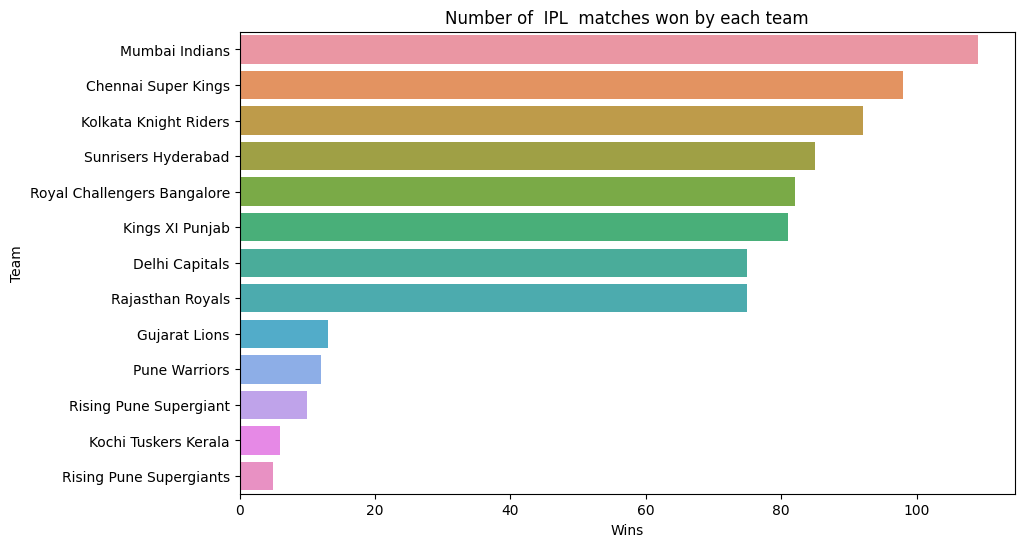

In [10]:
#Number of IPL matches won by each 
plt.figure(figsize= (10,6))
sns.countplot(y ='winner',data= df,order = df["winner"].value_counts().index )
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

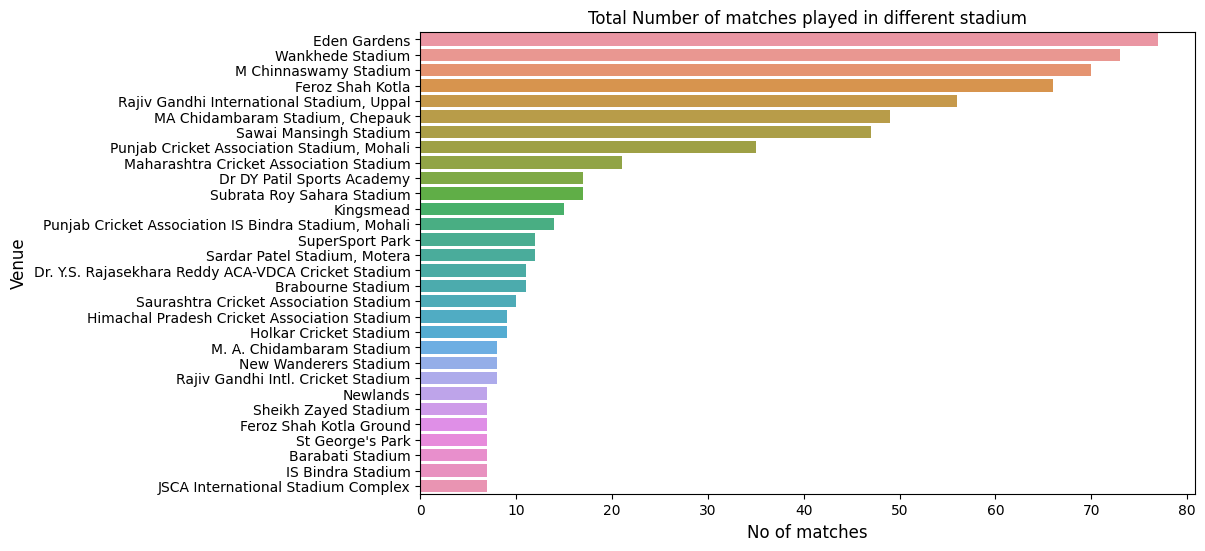

In [11]:
#Total number of matches played in a different stadium
plt.figure(figsize= (10,6))
sns.countplot(y = 'venue', data= df, order= df['venue'].value_counts().iloc[:-10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

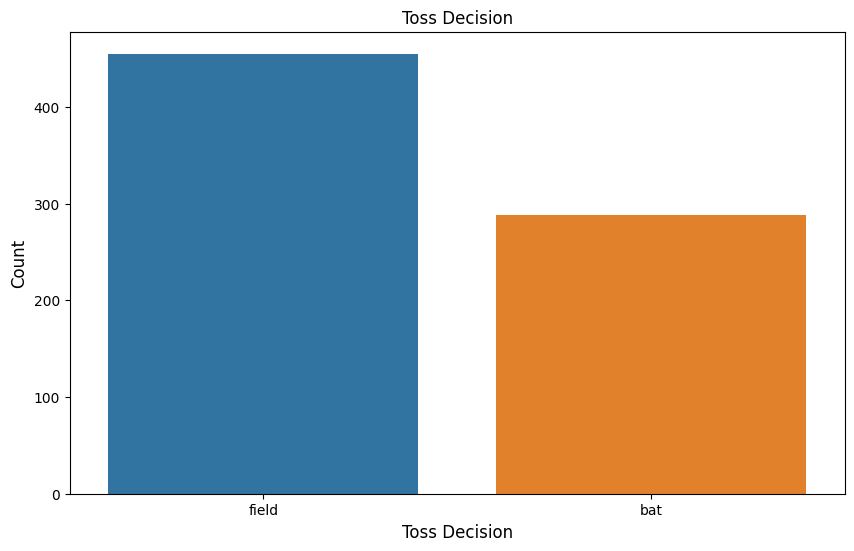

In [12]:
#The decision was taken by the toss winning team

plt.figure(figsize= (10,6))
sns.countplot(x= 'toss_decision',data= df)
plt.xlabel('Toss Decision',fontsize =12)
plt.ylabel('Count',fontsize= 12)
plt.title('Toss Decision')

In [13]:
#checking the unique values presented in each feature
x = ["city","toss_decision","result","dl_applied"]
for i in x:
    print("------------")
    print(df[i].unique())
    print(df[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Ahmedabad          12
Visakhapatnam      12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Cape Town           7
Abu Dhabi           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London 

In [14]:
#dropping some of the features that don’t affect our result

df.drop(["Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"],axis=1,inplace= True)

In [15]:
df.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9


In [16]:
# convert our data into dependent and independent
X= df.drop(["winner"],axis=1)
y= df["winner"]

In [17]:
#categorical values converting into numerical values
X= pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
#convert our data into a training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# Model Creation and Evaluation

In [20]:
#random Forest Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "auto")


In [21]:
#Training the random forest classifier model
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [22]:
#Predicting the model with x_test values and saving it as y_pred
y_pred = model.predict(x_test)

In [23]:
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [24]:
print(ac)

0.9060402684563759


# Observation-


## Accuracy score is 90%